# Naive Bayes Classification

Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem:
P(A|B) = P(B|A) * P(A) / P(B)

 **Key concepts:**
 1. Assumes features are independent (naive assumption)
 2. Uses conditional probability to predict class
 3. Calculates probability for each class and picks highest



<img src="https://miro.medium.com/v2/0*J5MLEJwQqhW41wg6.png" style="width:800px; height:500px"/>

<img src="https://miro.medium.com/v2/resize:fit:751/0*AOaAYWw6Musx93rK.png"/>



## Naive Bayes Classification Types:

1. Gaussian Naive Bayes
   - For **continuous data** with normal distribution
   - Used for classification when features follow **normal distribution**
   - **Common in real-valued features**

2. Multinomial Naive Bayes
   - For discrete data like **word counts**
   - Used in **text classification and document categorization**
   - **Features represent frequencies/counts**

3. Bernoulli Naive Bayes
   - For **binary/boolean features**
   - **Features are binary values (0/1)**
   - Used in text classification with word presence/absence

4. Complement Naive Bayes
   - Adapted for **imbalanced datasets**
   - Alternative to Multinomial NB
   - Better handles uneven class distributions

5. Categorical Naive Bayes
   - For categorical features
   - Each feature can have **multiple categories**
   - No assumption of ordering between categories
'''

<img src="https://i.imgur.com/1PZX4ay.png" style="width:800px; height:500px"/>

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import sklearn libraies and modules
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#import standartscaler
from sklearn.preprocessing import StandardScaler

In [5]:
# import gaussian NB
from sklearn.naive_bayes import GaussianNB

# import other naiveebayes models
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import ComplementNB
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import CategoricalNB

In [6]:
#read data
df=pd.read_csv("2_3_iris_dataset.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## About the Iris dataset

The Iris dataset is a classic, small supervised classification dataset with 150 samples and 3 classes:
- Iris-setosa, Iris-versicolor, Iris-virginica

It has 4 numeric features:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Common uses: teaching classification, visualization, quick model demos.

<img src="https://media.licdn.com/dms/image/v2/D4D12AQF5vivFTAdZjQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1700911428185?e=2147483647&v=beta&t=ORTz0ryrHA7aeMlRvFEH-J6Ymgg1cplspKTMn1VDs-U"/>

In [7]:
# EDA for dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df.drop(columns=['Id'], inplace=True)

In [13]:
# get random 5 rows
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,5.0,3.5,1.3,0.3,Iris-setosa
135,7.7,3.0,6.1,2.3,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor


In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

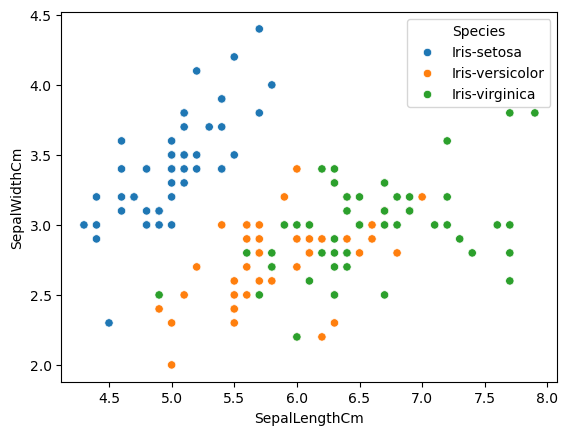

In [10]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.show()

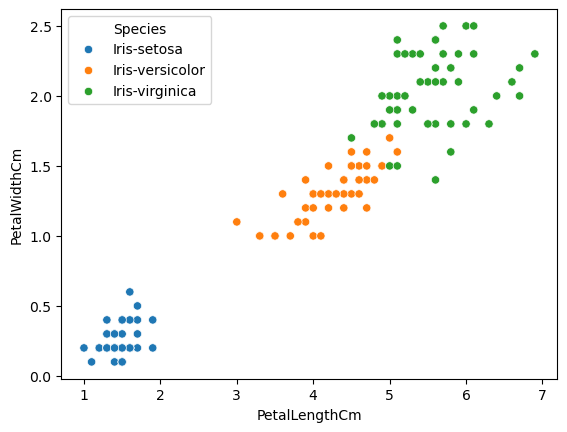

In [11]:
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.show()

In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [17]:
# Define X and y
X = df.drop('Species', axis=1)
y = df['Species']

In [18]:
#split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# see shape of data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [21]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [22]:
# prediction
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [23]:
# see the metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


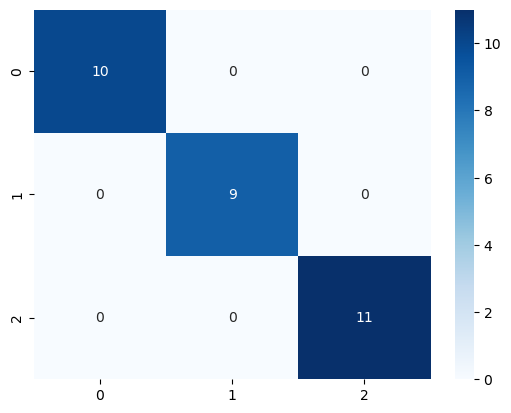

In [ ]:
# show confusion matrix of iris gaussianNaiveBayes model seaborn heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

----------------

## Spam-Ham Dataset Example and Bernoulli Naive Bayes (BNB)

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

In [33]:
# read csv file
df=pd.read_csv("2_3_spam_notspam_dataset.csv", sep="\t", header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

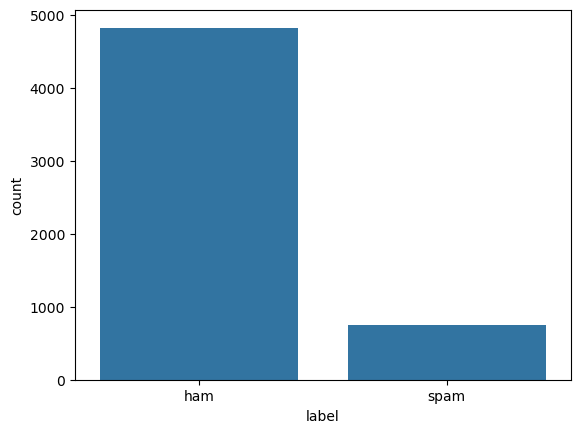

In [36]:
sns.countplot(data=df, x='label')
plt.show()

In [39]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [41]:
# Label Encoder -> convert label to 0 and 1
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [44]:
# add a column text length  
df['text_length'] = df['text'].str.len()

In [54]:
df

,label,text,text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [46]:
df.describe()

,label,text_length
count,5572.000000,5572.000000
mean,0.134063,80.490309
std,0.340751,59.944527
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,62.000000
75%,0.000000,122.000000
max,1.000000,910.000000


In [58]:
# find the max text_length row index
df['text_length'].idxmax() 


1085

In [60]:
df.iloc[df['text_length'].idxmax(), 1 ]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [62]:
# find the min text_length row index
df['text_length'].idxmin()

1925

In [63]:
df.iloc[df['text_length'].idxmin(), 1]

'Ok'

In [158]:
# define X(features),y(target)
X= df['text']
y=df['label']

In [159]:
# use vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X.shape

(5572, 8713)

In [160]:
print(type(X))

<class 'scipy.sparse._csr.csr_matrix'>


## CountVectorizer: Quick Overview

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*f7vm2NNrY98KLH-z7n3qDg.png"/>

Purpose
-------

Convert a collection of text documents into a matrix of token counts.

Class
-----

CountVectorizer from sklearn.feature\_extraction.text

How It Works
-------------------------

#### Tokenization

*   Splits text into tokens (words by default) using a built-in analyzer
    
*   Example: "Hello world" → \["Hello", "world"\]
    

#### Vocabulary

*   Builds a vocabulary of unique tokens across the corpus
    
*   Assigns an index to each unique token
    

#### Vectorization

*   Transforms each document into a sparse vector of counts
    
*   Each entry corresponds to the count of a token from the vocabulary
    

Key Parameters
--------------

| Parameter | Description | Default Value |  
|-----------|-------------|---------------|  
| `lowercase` | Convert text to lowercase | `True` |  
| `stop_words` | Remove common words | `None` |  
| `ngram_range` | Define n-gram range | `(1, 1)` |  
| `max_features` | Limit vocabulary size | `None` |  
| `analyzer` | Text analysis method | `'word'` |  



In [ ]:
#EXAMPLE

from sklearn.feature_extraction.text import CountVectorizer

# Sample text corpus
corpus = [
    "Go until jurong point, crazy..",
    "Ok lar... Joking wif u oni...",
    "Free entry in 2 a wkly comp to win FA Cup final"
]

# Create CountVectorizer instance
vectorizer_example = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 2) # unigrams and bigrams only 
    # explain: https://scikit-learn.org/stable/modules/feature_extraction.html
)

# Transform corpus
X_example = vectorizer_example.fit_transform(corpus)

# Print results
print("Matrix Shape:", X_example.shape)
print("Feature Names:", vectorizer_example.get_feature_names_out()[:])

Matrix Shape: (3, 29)
Feature Names: ['comp' 'comp win' 'crazy' 'cup' 'cup final' 'entry' 'entry wkly' 'fa'
 'fa cup' 'final' 'free' 'free entry' 'joking' 'joking wif' 'jurong'
 'jurong point' 'lar' 'lar joking' 'ok' 'ok lar' 'oni' 'point'
 'point crazy' 'wif' 'wif oni' 'win' 'win fa' 'wkly' 'wkly comp']


**When to Use**

* Simple bag-of-words representation
* Text classification
* Topic modeling
* Preprocessing for machine learning models

In [161]:
# show the example word matrix
pd.DataFrame(X_example.toarray(), columns=vectorizer_example.get_feature_names_out())

,comp,comp win,crazy,cup,cup final,entry,entry wkly,fa,fa cup,final,...,ok lar,oni,point,point crazy,wif,wif oni,win,win fa,wkly,wkly comp
0,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
2,0.258199,0.258199,0.000000,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258199,0.258199,0.258199,0.258199


In [162]:
# show the our word matrix
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
# use TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)
print(X.shape)

(5572, 8713)


Why use TfidfTransformer?
=============================================

*   **Purpose**: Convert raw token counts into TF-IDF weights so features reflect word _importance_, not just frequency.
    
*   **Problem with counts**: Common words (e.g., the, and) get large counts but are not very informative.
    
*   **TF-IDF idea**:
    
    *   **TF (Term Frequency)**: how often a word appears in a document.
        
    *   **IDF (Inverse Document Frequency)**: downweights words that appear in many documents.
        
*   **Result**: Features emphasize words that are frequent in a document but rare across the corpus — usually improving performance for classification and retrieval tasks.

In [164]:
# show X after Tfidf some example wiegiht is bigger than 0
tfidf_transformer_data=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

#see the some rows value is bigger than 0
tfidf_transformer_data.describe()


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.000402,0.001161,0.000042,0.000094,0.000045,0.000055,0.000052,0.000082,0.000092,0.000352,...,0.000049,0.000058,0.000104,0.000064,0.000052,0.000049,0.000029,0.000033,0.000040,0.000055
std,0.009510,0.018111,0.003123,0.004943,0.003352,0.004083,0.003888,0.004314,0.006843,0.009281,...,0.003669,0.004299,0.005467,0.004746,0.003886,0.003670,0.002150,0.002476,0.003011,0.004138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.240128,0.654425,0.233155,0.265767,0.250210,0.304792,0.290193,0.227745,0.510769,0.256937,...,0.273889,0.320935,0.296818,0.354245,0.290067,0.273938,0.160467,0.184833,0.224784,0.308912


In [165]:
#  print idf values 
df_idf = pd.DataFrame(
    tfidf_transformer.idf_,
    index=vectorizer.get_feature_names_out(),  # <-- call the method
    columns=["idf_weights"]
)

# sort ascending and show
df_idf = df_idf.sort_values(by=['idf_weights'])
print(df_idf)


        idf_weights
to         2.194389
you        2.252942
the        2.682566
in         2.927421
and        2.946090
...             ...
zyada      8.932542
èn         8.932542
ú1         8.932542
〨ud        8.932542
000pes     8.932542

[8713 rows x 1 columns]


IDF weights — Spam context
=======================================

*   **What it is**: _IDF_ measures how rare a token is across the corpus.
    
    *   Low IDF → common token; High IDF → rare token.
        
*   **Spam signals**:
    
    *   **High IDF**: _rare/odd strings_ (obfuscation, typos, codes) — **suspicious** for spam.
        
    *   **Low IDF**: common words (the, you) — **not discriminative** alone.
        
    *   **Mix**: spam often combines common words with high-IDF rare tokens (e.g., “You won 000pes”).
        
*   **Practical use**:
    
    *   Use TF-IDF so rare, potentially spammy tokens get more weight.
        
    *   Combine with other signals (URLs, phone numbers, punctuation, length) for reliable detection.
        
*   **Rule of thumb**: **High IDF → suspicious**, **Low IDF → common**.

In [153]:
#EXAMPLE

from sklearn.feature_extraction.text import CountVectorizer

# Sample text corpus
corpus = [
    "Go until jurong point, crazy..",
    "Ok lar... Joking wif u oni...",
    "Free entry in 2 a wkly comp to win FA Cup final"
]

# Create CountVectorizer instance
vectorizer_example = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 2) # unigrams and bigrams only 
    # explain: https://scikit-learn.org/stable/modules/feature_extraction.html
)

# Transform corpus
X_example = vectorizer_example.fit_transform(corpus)

# Print results
print("Matrix Shape:", X_example.shape)
print("Feature Names:", vectorizer_example.get_feature_names_out()[:])

# Use TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
X_example = tfidf_transformer.fit_transform(X_example)
print(X_example.shape)

# show X after Tfidf some example wiegiht is bigger than 0
tfidf_transformer_data_example=pd.DataFrame(X_example.toarray(), columns=vectorizer_example.get_feature_names_out())

tfidf_transformer_data_example #tfidf_transformer_data_example



Matrix Shape: (3, 29)
Feature Names: ['comp' 'comp win' 'crazy' 'cup' 'cup final' 'entry' 'entry wkly' 'fa'
 'fa cup' 'final' 'free' 'free entry' 'joking' 'joking wif' 'jurong'
 'jurong point' 'lar' 'lar joking' 'ok' 'ok lar' 'oni' 'point'
 'point crazy' 'wif' 'wif oni' 'win' 'win fa' 'wkly' 'wkly comp']
(3, 29)


,comp,comp win,crazy,cup,cup final,entry,entry wkly,fa,fa cup,final,...,ok lar,oni,point,point crazy,wif,wif oni,win,win fa,wkly,wkly comp
0,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
2,0.258199,0.258199,0.000000,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258199,0.258199,0.258199,0.258199


In [154]:
# print idf values 
df_idf = pd.DataFrame(
    tfidf_transformer.idf_,
    index=vectorizer_example.get_feature_names_out(),  # <-- call the method
    columns=["idf_weights"]
)

# sort ascending and show
df_idf = df_idf.sort_values(by=['idf_weights'])
print(df_idf)

              idf_weights
comp             1.693147
comp win         1.693147
crazy            1.693147
cup              1.693147
cup final        1.693147
entry            1.693147
entry wkly       1.693147
fa               1.693147
fa cup           1.693147
final            1.693147
free             1.693147
free entry       1.693147
joking           1.693147
joking wif       1.693147
jurong           1.693147
jurong point     1.693147
lar              1.693147
lar joking       1.693147
ok               1.693147
ok lar           1.693147
oni              1.693147
point            1.693147
point crazy      1.693147
wif              1.693147
wif oni          1.693147
win              1.693147
win fa           1.693147
wkly             1.693147
wkly comp        1.693147


In [177]:
# Now lets split our train sets and test sets

# print X and y
print("X Word matrix:", X.toarray()[:3])
print(X.shape)
print("-----------------")
print("y labels:", y.head())
print(y.value_counts())
print(y.shape)


X Word matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5572, 8713)
-----------------
y labels: 0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64
label
0    4825
1     747
Name: count, dtype: int64
(5572,)


In [178]:
# split data as train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("-----------------")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4457, 8713)
y_train shape: (4457,)
-----------------
X_test shape: (1115, 8713)
y_test shape: (1115,)


In [179]:
# create Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [180]:
#prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [182]:
# see correlation matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9847533632286996
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[963   3]
 [ 14 135]]


In [202]:
# do the same thing with other Naive Bayes models with using Pipeline
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB, BernoulliNB

from sklearn.pipeline import Pipeline

X=df['text']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



pipeline_multinomial = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

pipeline_bernoulli = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', BernoulliNB())
])




pipeline_multinomial.fit(X_train, y_train)
pipeline_bernoulli.fit(X_train, y_train)



y_pred_multinomial = pipeline_multinomial.predict(X_test)
y_pred_bernoulli = pipeline_bernoulli.predict(X_test)



print("Accuracy MultinomialNB:", accuracy_score(y_test, y_pred_multinomial))
print("Accuracy BernoulliNB:", accuracy_score(y_test, y_pred_bernoulli))

print("Classification Report MultinomialNB:\n", classification_report(y_test, y_pred_multinomial))
print("Classification Report BernoulliNB:\n", classification_report(y_test, y_pred_bernoulli))

print("Confusion Matrix MultinomialNB:\n", confusion_matrix(y_test, y_pred_multinomial))
print("Confusion Matrix BernoulliNB:\n", confusion_matrix(y_test, y_pred_bernoulli))




Accuracy MultinomialNB: 0.9668161434977578
Accuracy BernoulliNB: 0.9820627802690582
Classification Report MultinomialNB:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Classification Report BernoulliNB:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix MultinomialNB:
 [[966   0]
 [ 37 112]]
Confusion Matrix BernoulliNB:
 [[966   0]
 [ 20 129]]


MultinomialNB vs BernoulliNB
----------------------------

 **Core Difference**

*   **MultinomialNB**: Word **counts** \[0, 3, 1, 2\]
    
*   **BernoulliNB**: Word **presence** \[0, 1, 1, 1\]
    

 **When to Use**

*   **MultinomialNB**: Long documents, frequency matters
    
*   **BernoulliNB**: Short texts (tweets, SMS), binary features
    

 **Example**

Text: "spam spam offer"

*   **MultinomialNB**: \[spam:2, offer:1\]
    
*   **BernoulliNB**: \[spam:1, offer:1\]
    

 **Rule**

Long docs → Multinomial | Short docs → Bernoulli

---End----